In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv("Diabetes dataset.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


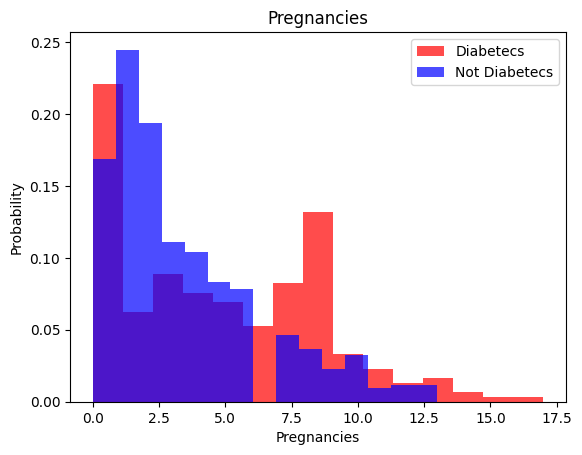

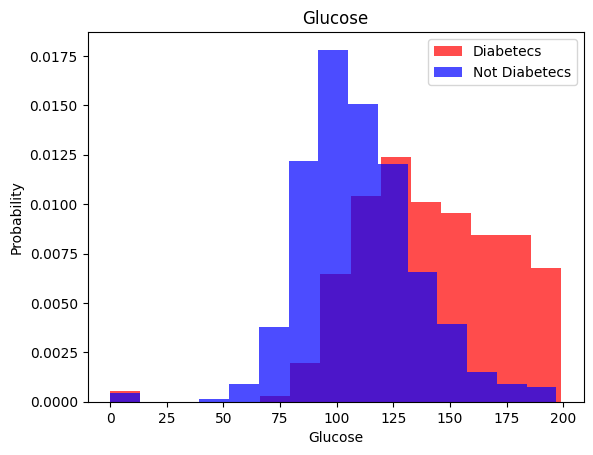

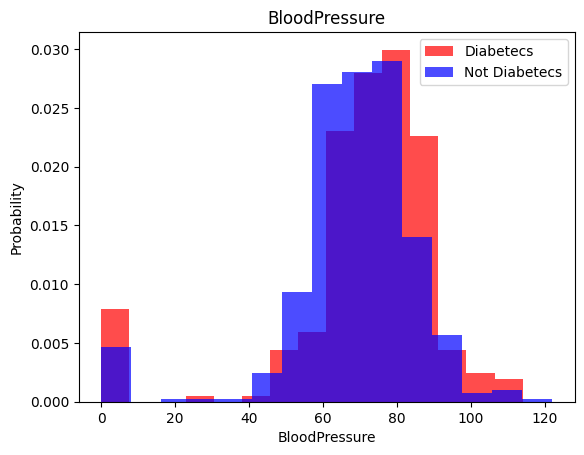

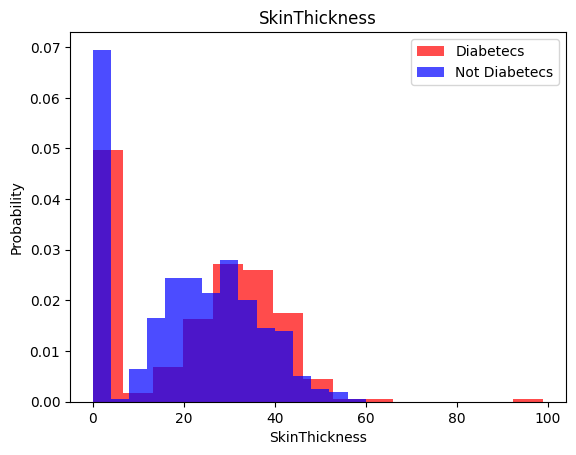

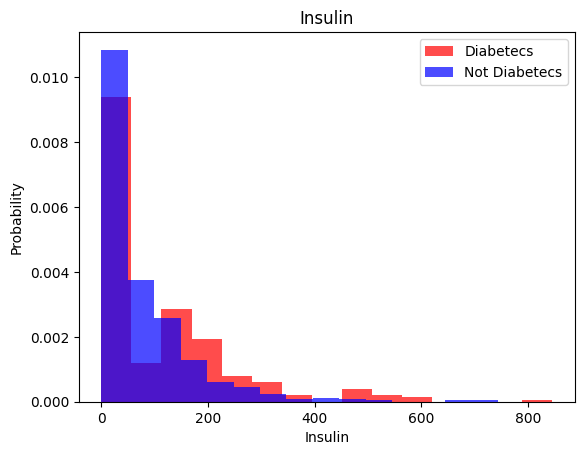

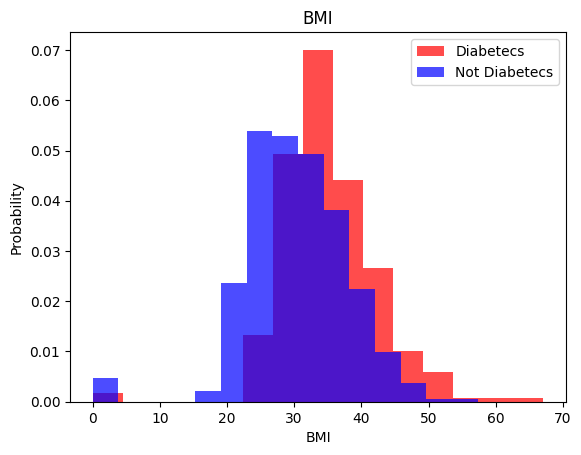

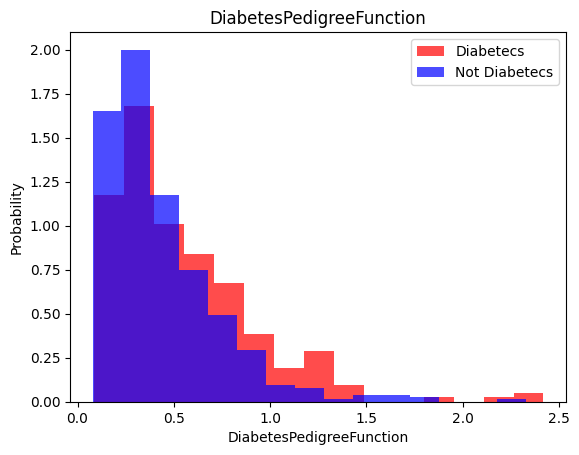

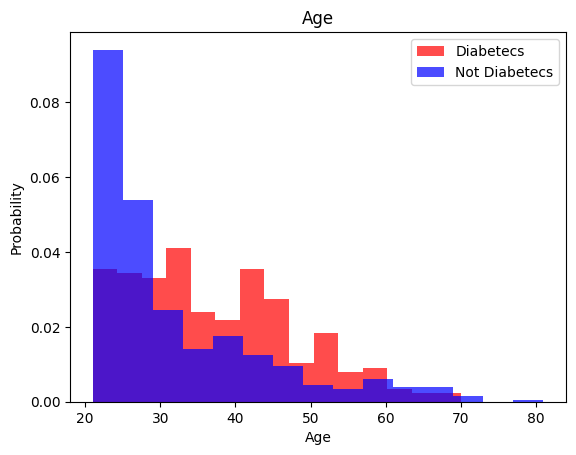

In [8]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df["Outcome"] == 1][label], color='red', label='Diabetecs', alpha = 0.7, density=True, bins=15)
  plt.hist(df[df["Outcome"] == 0][label],color = 'blue', label='Not Diabetecs', alpha = 0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [11]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [24]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X)
data = np.hstack((X,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [32]:
over = RandomOverSampler()
X,y = over.fit_resample(X,y)
data = np.hstack((X,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [26]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

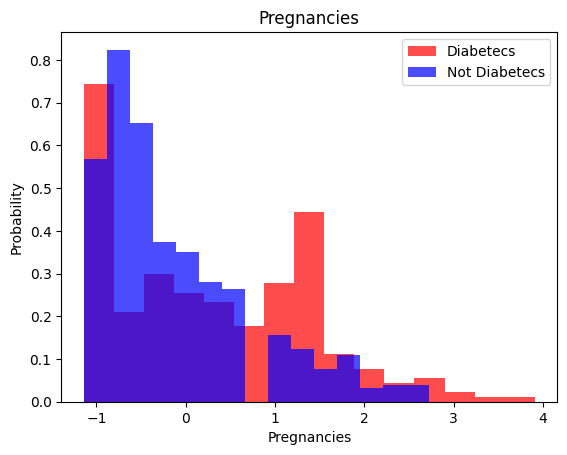

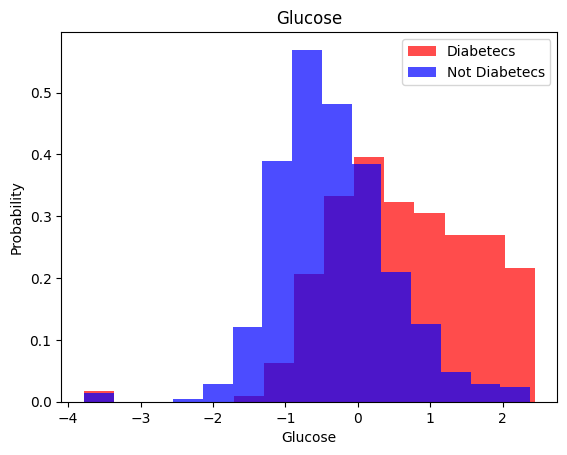

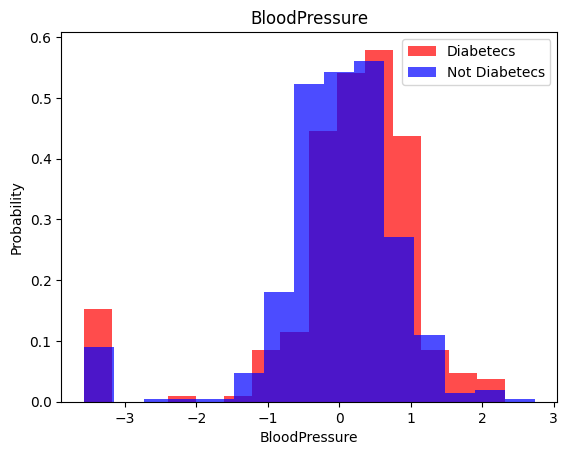

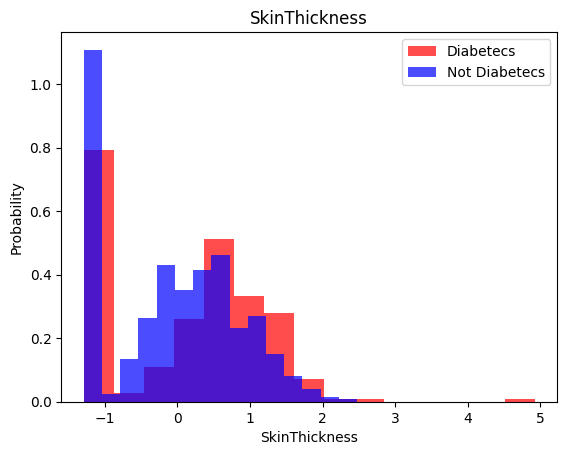

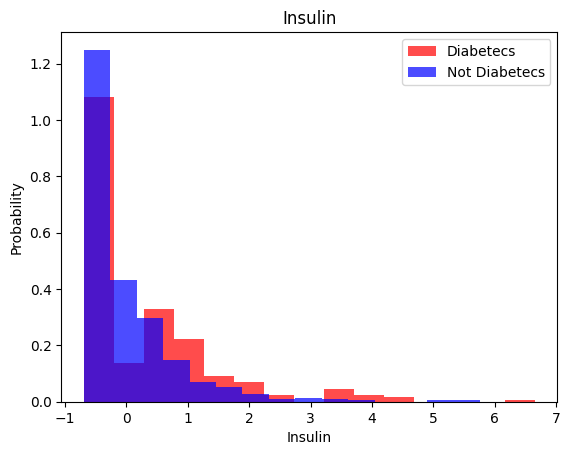

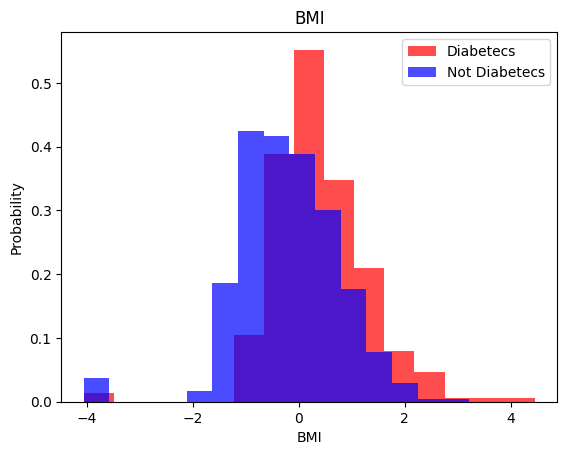

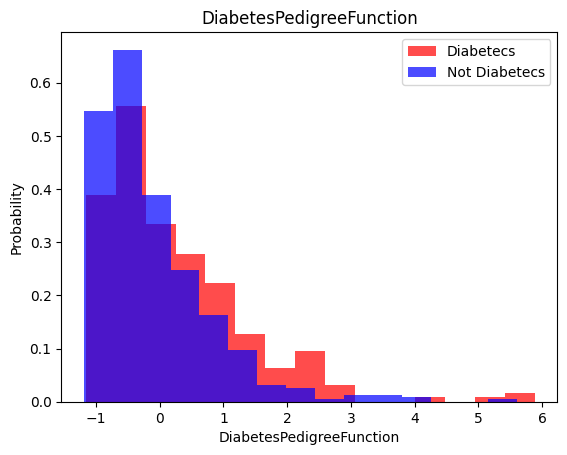

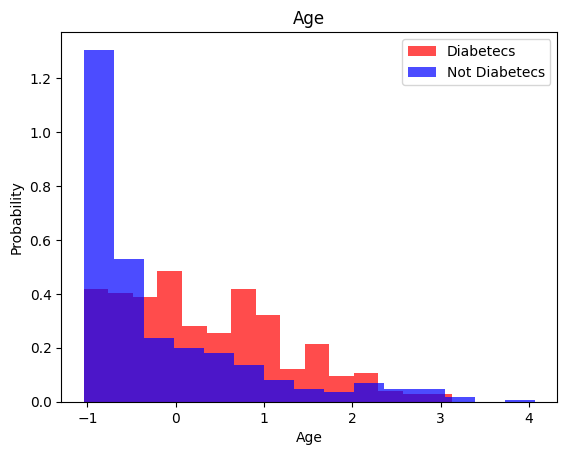

In [25]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df["Outcome"] == 1][label], color='red', label='Diabetecs', alpha = 0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df["Outcome"] == 0][label],color = 'blue', label='Not Diabetecs', alpha = 0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [12]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [33]:
len(transformed_df[transformed_df["Outcome"]==1]),len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [34]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4,random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=0)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [35]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [36]:
model.evaluate(X_train,y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4906 - loss: 0.7177  


[0.7143585085868835, 0.5016666650772095]

In [37]:
model.evaluate(X_val,y_val)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5790 - loss: 0.6855 


[0.6888006329536438, 0.5600000023841858]

In [38]:
model.fit(X_train,y_train,epochs=20,batch_size=16,validation_data=(X_val,y_val))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5503 - loss: 0.6951 - val_accuracy: 0.7400 - val_loss: 0.6271
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7146 - loss: 0.6305 - val_accuracy: 0.7350 - val_loss: 0.5890
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7461 - loss: 0.5892 - val_accuracy: 0.7650 - val_loss: 0.5582
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7418 - loss: 0.5705 - val_accuracy: 0.7650 - val_loss: 0.5328
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7471 - loss: 0.5499 - val_accuracy: 0.7700 - val_loss: 0.5112
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7500 - loss: 0.5396 - val_accuracy: 0.7600 - val_loss: 0.4951
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7471 - loss: 0.5035 - val_accuracy: 0.7700 - val_loss: 0.4818
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7644 - loss: 0.4949 - val_accuracy: 0.7700 - val_loss:

In [39]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7915 - loss: 0.4335 


[0.4699763357639313, 0.7599999904632568]